In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

/var/folders/q0/2htxwbl92pv_k6v0p021gqvm0000gn/T/ipykernel_66740/825731713.py:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")


In [3]:
df.head(5)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


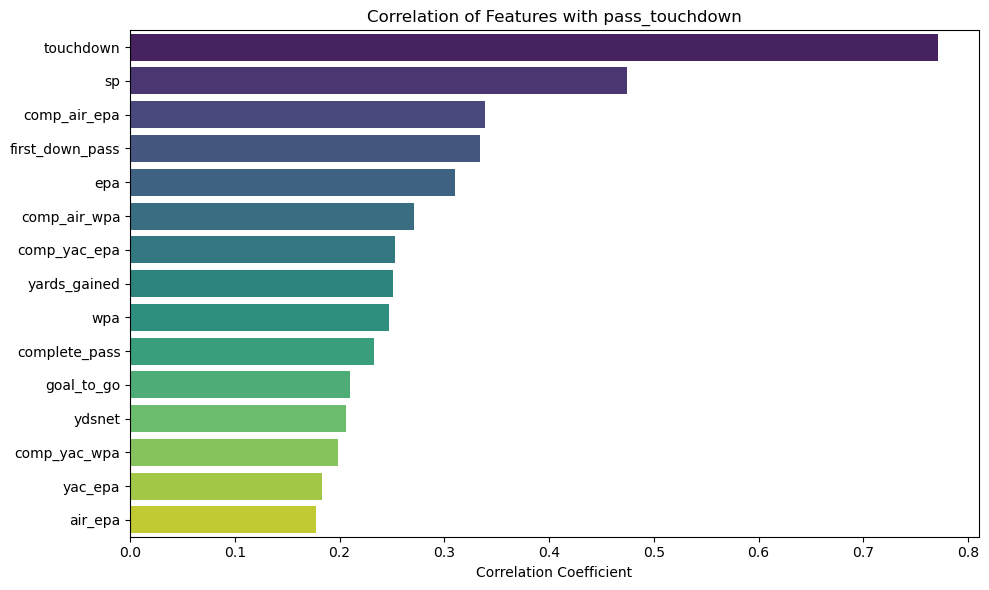

In [4]:
corr = df.corr(numeric_only=True)
target_corr = corr['pass_touchdown'].drop('pass_touchdown').sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.title('Correlation of Features with pass_touchdown')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [28]:
pass_df = df[df['play_type'] == 'pass']

columns = ['quarter_seconds_remaining', 'down', 'ydstogo', 'yardline_100',
                     'pass_length', 'score_differential', 'qb_scramble', 'shotgun', 'no_huddle',
                     'qtr', 'posteam_score', 'defteam_score', 'goal_to_go']

input_features = pass_df[columns]

target_features = pass_df['pass_touchdown']

input_features = input_features.dropna()
target_features = target_features.loc[input_features.index]

input_features.head()

,quarter_seconds_remaining,down,ydstogo,yardline_100,pass_length,score_differential,qb_scramble,shotgun,no_huddle,qtr,posteam_score,defteam_score,goal_to_go
1,893.0,1.0,10,58.0,short,0.0,0,0,0,1,0.0,0.0,0.0
3,815.0,3.0,8,56.0,deep,0.0,0,1,0,1,0.0,0.0,0.0
6,760.0,2.0,10,98.0,short,0.0,0,0,0,1,0.0,0.0,0.0
9,684.0,1.0,10,43.0,short,0.0,0,0,0,1,0.0,0.0,0.0
10,648.0,2.0,7,40.0,short,0.0,0,0,0,1,0.0,0.0,0.0


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_cols = ['pass_length']
numeric_cols = [col for col in input_features if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

input_features = preprocessor.fit_transform(input_features)

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
input_features = pd.DataFrame(input_features)
X_train, X_test, y_train, y_test = train_test_split(input_features, target_features, test_size=0.2, random_state=513)
feature_names = X_train.columns

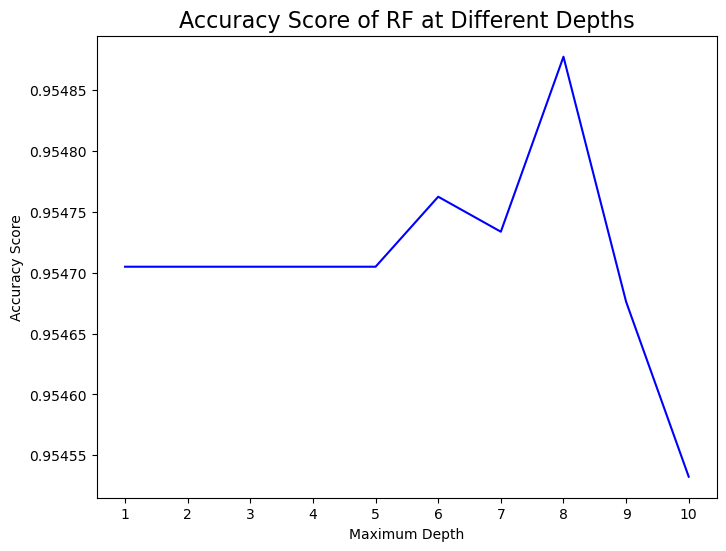

In [9]:
from sklearn.ensemble import RandomForestClassifier
accuracy_scores = []
for depth in range(1, 11):
    rf = RandomForestClassifier(max_depth = depth)
    rf.fit(X_train, y_train)
    accuracy_scores.append(rf.score(X_test, y_test))
    
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), accuracy_scores, c="blue")
plt.title('Accuracy Score of RF at Different Depths', size=16)
plt.xlabel('Maximum Depth')
plt.xticks(range(1, 11))
plt.ylabel('Accuracy Score')
plt.show()

As you can see, the depth of the forest seems to correlate with a higher accuracy score. For the final model we'll use a max_depth of 10.

In [17]:
final_model = RandomForestClassifier(max_depth = 8)
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [18]:
y_pred = final_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.954848728862303
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     33197
         1.0       0.52      0.04      0.08      1575

    accuracy                           0.95     34772
   macro avg       0.74      0.52      0.53     34772
weighted avg       0.94      0.95      0.94     34772



In [20]:
new_data = {
    'quarter_seconds_remaining': [893.0],
    'down': [1.0],
    'ydstogo': [10],
    'yardline_100': [18.0],
    'pass_length': ['short'],
    'air_yards': [15.0],
    'yards_after_catch': [0.0],
    'score_differential': [0.0],
    'qb_scramble': [0],
    'qtr': [1],
    'shotgun': [0],
    'no_huddle': [0],
    'posteam_score': [0.0],
    'defteam_score': [0.0],
    'goal_to_go': [0.0]
}

X_new = pd.DataFrame(new_data)

In [21]:
X_new = preprocessor.transform(X_new)
print(X_new)

[[ 1.73668247 -1.10672201  0.2693524  -1.45869189  0.27407594 -0.00678354
  -1.52051916 -0.34038403 -1.40834741 -1.10442777 -1.17788609 -0.23030401
   1.        ]]


In [22]:
prediction = final_model.predict(X_new)
print(prediction)

[0.]


<module 'matplotlib.pyplot' from '/Users/daniel/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

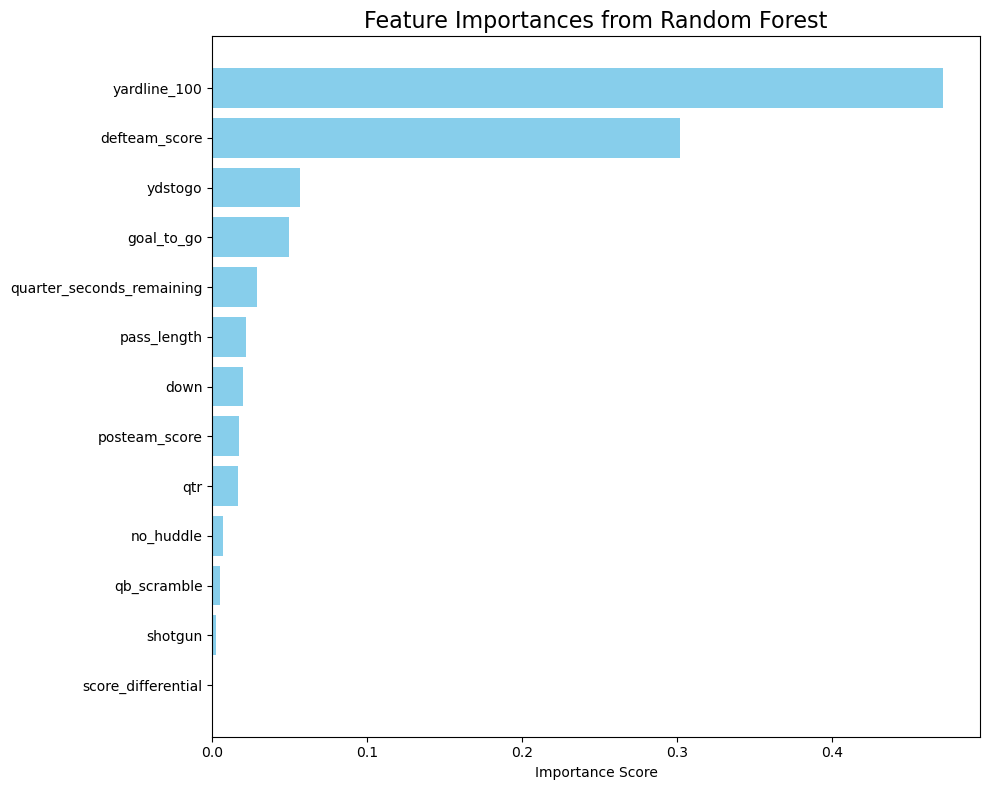

In [29]:
importances = final_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': list(input_features),
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances from Random Forest', size=16)
plt.xlabel('Importance Score')
plt.tight_layout()
plt